In [ ]:
# installing library for using KMedoids
!pip install scikit-learn-extra
# installing library for using clarans
!pip3 install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **About dataset**
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.
</br>
Dataset link: https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics
from pyclustering.cluster.clarans import clarans
warnings.filterwarnings('ignore')

In [ ]:
# load the the seed dataset 
seed=pd.read_csv('seeds.csv',header=None)
#Print the Dataframe
seed.head()



,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# Unique class labels
seed[7].unique()

array([1, 2, 3])

In [ ]:
#mapping the seed labels
mp={1:0,2:1,3:2}
seed[7]=seed[7].map(mp)

In [ ]:
print(f'Duplicate rows in the datsaset :{seed.duplicated().sum()}\n') 

Duplicate rows in the datsaset :0



In [ ]:
# Displaying the number of instances and attributes
seed.shape

(210, 8)

In [ ]:
# Total null values in each column
seed.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [ ]:
#extracting feature columns from the tumor dataframe
feature_cols_seed=seed.columns.tolist()[:-1]

# **Limitations of KMeans** 
(i) ***Clustering Outliers***

* The KMeans algorithm relies on concept of calculating the centroid during every iteration by finding out the mean of all the points within the cluster at that time. Also in KMeans algorithm, each point must belong to one cluster.
* Hence the presence of outliers can substantially change the mean and adversely affect the clustering process. This is a limitation of prototype clustering.


(ii) ***Scaling with number of dimensions***
* The KMeans algorithm performs very badly for datasets with a large no of dimensions. The reason for this is that the sparsity of the dataspace increases exponentially with increasing number of dimensions.

* Also with increasing number of dimensions,the notion of proximity turns out to be very ineffective due to highly sparse high dimensional data spaces. In such a data space, all points appear to be equidistant. Hence prototype clustering doesn't work well with high dimensional data.


# **Algorithms addressing limitations of KMeans**

(i) ***Clustering Outliers*** 
* The prototype clustering method that tries to overcome the limitation of KMeans for data with outliers is called **KMedoids**. In this variant of KMeans, the cluster centres are not random points in the data space rather they are datapoints themselves. 
* Clustering is done by identifying the most centrally located data point as the cluster centre also called medoids.
* Noise points can never be centrally located data points and hence can never become the cluster centres or medoids. Hence noise becomes secluded from the clusters formed and so KMedoids is robust to outliers. 

(ii) ***Scaling with number of dimensions*** 

* Clustering Large Applications based upon Randomized Search (CLARANS). The KMedoid clustering technique removes the limitation of KMeans of getting affected by oultier in the input data. But KMedoid is computationally very costly for large values of K and high dimensional data.
* The CLARA algorithm is an extension of KMedoids and instead of using the entire input data it uses only random sample of it. But it does not peroform well if one or more medoid in the sampled input data is far away from the actual medoid in the input data. 
* CLARANS takes care of the limitation of KMedoid and CLARA by maintaining  a balance between computational cost and the influence of data sampling on clustering. CLARA does the sampling at beginning of the process however CLARANS does sampling of neighbors in each iteration.  




# **Clustering using KMedoid, CLARANS and comparison with KMeans**

## **Visualization of given class labels**

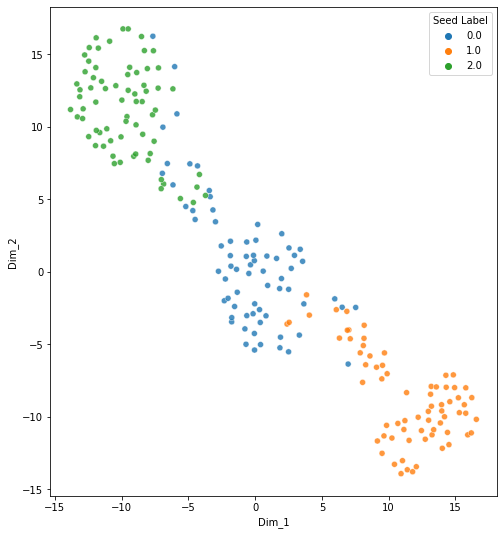

In [ ]:



#Performing tsne on the dataset which will help in cluster visualization
tsne = TSNE(n_components = 2, random_state = 0)
tsne_euc = tsne.fit_transform(seed[feature_cols_seed])
seed_labels= seed[7].values
seed_labels=np.array(seed_labels).reshape(-1,1)


# creating a new tsne dataframe which help us in plotting the groundtruth and resulting cluter later on 
tsne_data = np.concatenate((tsne_euc, seed_labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "Seed Label"))


colors = sns.color_palette()
modes_gt=tsne_df['Seed Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}


plt.figure(figsize = (8, 9))
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df, hue='Seed Label',palette=palette_gt,alpha=0.8);

## **Clustering and Visualization of dataset**

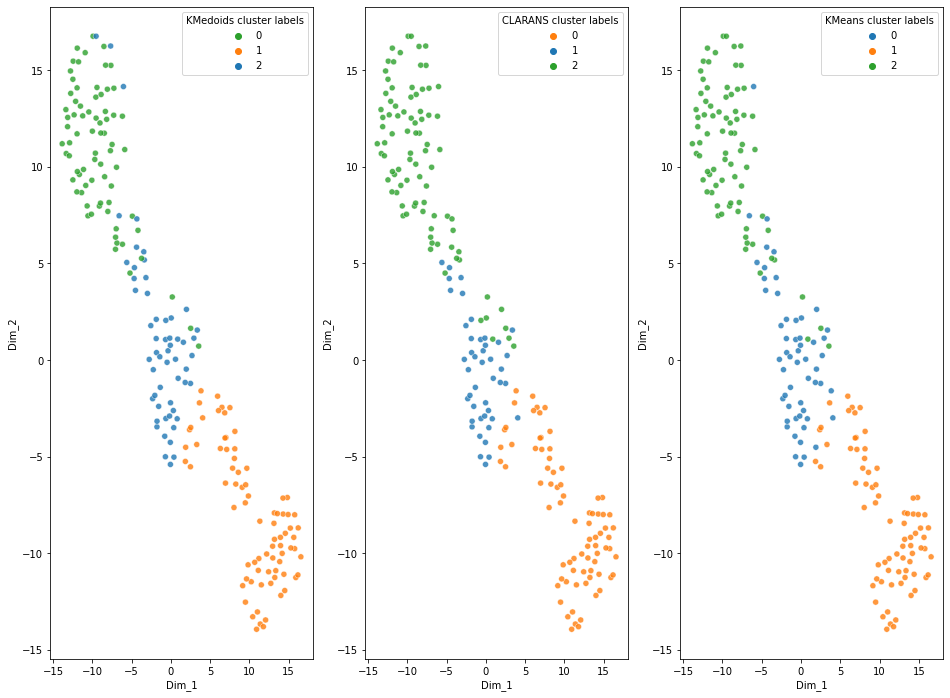

****************************
KMedoids
Intrinsic Measure:

Silhouette Coefficient: 0.480
Calinski and Harabasz score: 243.876
Davies-Bouldin score: 0.894

Extrinsic Measure:

Random index: 0.876
Fowlkes-Mallows score: 0.815
Adjusted Random index: 0.722
Adjused mutual Info score: 0.698
****************************
CLARANS
Intrinsic Measure:

Silhouette Coefficient: 0.480
Calinski and Harabasz score: 244.790
Davies-Bouldin score: 0.855

Extrinsic Measure:

Random index: 0.832
Fowlkes-Mallows score: 0.755
Adjusted Random index: 0.628
Adjused mutual Info score: 0.627
****************************
KMeans
Intrinsic Measure:

Silhouette Coefficient: 0.493
Calinski and Harabasz score: 258.538
Davies-Bouldin score: 0.855

Extrinsic Measure:

Random index: 0.862
Fowlkes-Mallows score: 0.793
Adjusted Random index: 0.689
Adjused mutual Info score: 0.657


In [ ]:
from sklearn.preprocessing import normalize, StandardScaler


# z-score normalization on data
seed_std= StandardScaler().fit_transform(seed[feature_cols_seed])
# converting each feature vector into unit vector
normalized_df_seed=normalize(seed_std)


tsne_df_clus=tsne_df.copy()

# KMedoids Clustering of seeds dataset (dataset 3)
clusterer_kmed=KMedoids(n_clusters=3, random_state=0,method='pam',metric='manhattan',init='k-medoids++').fit(normalized_df_seed)
tsne_df_clus['KMedoids cluster labels']=clusterer_kmed.labels_




# Clustering using ClARANS of seeds dataset (dataset 3)
d={}
# The choice of the parameters is motivated by the fact
#that high computing resources are required for CALARNS
#hence lower values of parameters have been chosen in the absence of high computing machine
clarans_instance = clarans(normalized_df_seed, number_clusters=3, numlocal=4, maxneighbor=3)
clarans_instance.process()
d['clusters'] = clarans_instance.get_clusters()
d['medoids'] = clarans_instance.get_medoids()

# clarans return list of index of data points in each cluster 
# code to map clarans clsuter label to the existing dataframe
indices_0=d['clusters'][0]
indices_1=d['clusters'][1]
indices_2=d['clusters'][2]
tsne_df_clus['CLARANS cluster labels']=[-1]* len(tsne_df_clus)

tsne_df_clus.iloc[tsne_df_clus.index.isin(indices_0),[4]]=0
tsne_df_clus.iloc[tsne_df_clus.index.isin(indices_1),[4]]=1
tsne_df_clus.iloc[tsne_df_clus.index.isin(indices_2),[4]]=2



#Clustering using KMeans of seeds dataset (dataset 3)
clusterer_kmeans=KMeans(n_clusters=3).fit(normalized_df_seed)
tsne_df_clus['KMeans cluster labels']=clusterer_kmeans.labels_




# Visualization of cluster labels obtained using KMedoids, CLARANS and  KMeans
colors = sns.color_palette()

modes_kmed=tsne_df_clus['KMedoids cluster labels'].unique()
palette_kmed = {mode: color for mode, color in zip(modes_kmed, colors)}

modes_clus_clara=tsne_df_clus['CLARANS cluster labels'].unique()
palette_clus_clara = {mode: color for mode, color in zip(modes_clus_clara, colors)}

modes_clus_kmean=tsne_df_clus['KMeans cluster labels'].unique()
palette_clus_kmean = {mode: color for mode, color in zip(modes_clus_kmean, colors)}

plt.figure(figsize = (16, 12))
ax = plt.subplot(1,3,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_clus, ax= ax,hue='KMedoids cluster labels',palette=palette_kmed,alpha=0.8);
ax = plt.subplot(1,3,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_clus, ax= ax, hue='CLARANS cluster labels',palette=palette_clus_clara,alpha=0.8);
ax = plt.subplot(1,3,3)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_clus, ax= ax, hue='KMeans cluster labels',palette=palette_clus_kmean,alpha=0.8);
plt.show()





# computing various cluster performance measures



# For KMedoids

y_true=tsne_df_clus['Seed Label'].values.tolist()
y_pred=tsne_df_clus['KMedoids cluster labels'].values.tolist()


# calculating intrinsic measures 
SIL_ward=metrics.silhouette_score(normalized_df_seed, y_pred)
CH_ward=metrics.calinski_harabasz_score(normalized_df_seed, y_pred)
DB_ward=metrics.davies_bouldin_score( normalized_df_seed,  y_pred)


# calculating extrinsic measures
RI_ward=metrics.rand_score(y_true,y_pred)
FM_ward=metrics.fowlkes_mallows_score(y_true,y_pred)
ARS_ward=metrics.adjusted_rand_score(y_true,y_pred)
AMS_ward=metrics.adjusted_mutual_info_score(y_true,y_pred)

print('****************************')
print(f'KMedoids')
print('Intrinsic Measure:\n')
print(f'Silhouette Coefficient: {SIL_ward:.3f}')
print(f'Calinski and Harabasz score: {CH_ward:.3f}')
print(f'Davies-Bouldin score: {DB_ward:.3f}')
print('')
 
print('Extrinsic Measure:\n')

print(f'Random index: {RI_ward:.3f}')
print(f'Fowlkes-Mallows score: {FM_ward:.3f}')
print(f'Adjusted Random index: {ARS_ward:.3f}')
print(f'Adjused mutual Info score: {AMS_ward:.3f}')


# For CLARANS

y_true=tsne_df_clus['Seed Label'].values.tolist()
y_pred=tsne_df_clus['CLARANS cluster labels'].values.tolist()


# calculating intrinsic measures 
SIL_ward=metrics.silhouette_score(normalized_df_seed, y_pred)
CH_ward=metrics.calinski_harabasz_score(normalized_df_seed, y_pred)
DB_ward=metrics.davies_bouldin_score( normalized_df_seed,  y_pred)


# calculating extrinsic measures
RI_ward=metrics.rand_score(y_true,y_pred)
FM_ward=metrics.fowlkes_mallows_score(y_true,y_pred)
ARS_ward=metrics.adjusted_rand_score(y_true,y_pred)
AMS_ward=metrics.adjusted_mutual_info_score(y_true,y_pred)


print('****************************')
print(f'CLARANS')
print('Intrinsic Measure:\n')
print(f'Silhouette Coefficient: {SIL_ward:.3f}')
print(f'Calinski and Harabasz score: {CH_ward:.3f}')
print(f'Davies-Bouldin score: {DB_ward:.3f}')
print('')
 
print('Extrinsic Measure:\n')

print(f'Random index: {RI_ward:.3f}')
print(f'Fowlkes-Mallows score: {FM_ward:.3f}')
print(f'Adjusted Random index: {ARS_ward:.3f}')
print(f'Adjused mutual Info score: {AMS_ward:.3f}')



# For KMeans

y_true=tsne_df_clus['Seed Label'].values.tolist()
y_pred=tsne_df_clus['KMeans cluster labels'].values.tolist()


# calculating intrinsic measures 
SIL_ward=metrics.silhouette_score(normalized_df_seed, y_pred)
CH_ward=metrics.calinski_harabasz_score(normalized_df_seed, y_pred)
DB_ward=metrics.davies_bouldin_score( normalized_df_seed,  y_pred)


# calculating extrinsic measures
RI_ward=metrics.rand_score(y_true,y_pred)
FM_ward=metrics.fowlkes_mallows_score(y_true,y_pred)
ARS_ward=metrics.adjusted_rand_score(y_true,y_pred)
AMS_ward=metrics.adjusted_mutual_info_score(y_true,y_pred)


print('****************************')
print(f'KMeans')
print('Intrinsic Measure:\n')
print(f'Silhouette Coefficient: {SIL_ward:.3f}')
print(f'Calinski and Harabasz score: {CH_ward:.3f}')
print(f'Davies-Bouldin score: {DB_ward:.3f}')
print('')
 
print('Extrinsic Measure:\n')

print(f'Random index: {RI_ward:.3f}')
print(f'Fowlkes-Mallows score: {FM_ward:.3f}')
print(f'Adjusted Random index: {ARS_ward:.3f}')
print(f'Adjused mutual Info score: {AMS_ward:.3f}')







## Standard behaviour of the cluster validity indices used
* The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
* The minimum value for Davies-Bouldin score is 0, with lower values indicating better clustering.
* The higher the Calinski and Harabasz score , the better the performances. 
* The Rand Index may only yield a value between 0 and 1 with higher value indicating better clustering. 

* Fowlkes-Mallows score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

## **Comparison of the results of KMedoids, CLARANS and KMeans clustering on the  based on cluster validity indices**
* Extrinsic measures perform better for KMedoid, CLARANS and KMeans report the same values for extrinsic measures.
* For intrinsic measures KMeans perform slightly better than KMedoid and CLARA.
* CLARANS perform better than KMedoids in intrinsic measures while KMedoid peroforms better in extrinsic measures.
* It can be concluded that all the three algorithms perform well on dataset 3.




# **Strategy adopted for Hyperparameter tuning**


For each dataset the hyperparameter tuning in case of KMedoid is done by varying the following input hyperparameters:

* **metric** :  The distance metric to use for calculating proximity between clusters. We are tuning for:
   * euclidean
   * cosine 
   * manhattan</br>
* **init** : The medoid initialization method to be used. It has the following values:
  * 'random’ selects n_clusters elements from the dataset. 
  * ‘heuristic’ picks the n_clusters points with the smallest sum distance to every other point. 
  * ‘k-medoids++’ follows an approach based on k-means++ , and in general, gives initial medoids which are more separated than those generated by the other methods. 
  * ‘build’ is a greedy initialization of the medoids used in the original PAM algorithm 

The hyperparameters availabe in CLARANS are:
* **number_clusters** : the number of clusters to create in the data
* **maxneighbor**: maximum number of neighbors examined
* **numlocal** : the number of local minima obtained (numLocal)







   

## **Hyperparameter tuning for Kmedoids**

In [ ]:
#using metric and init hyperparameters to tune for KMedoids
met=['euclidean','cosine','manhattan'] # various values for metrics 
init=['random', 'heuristic', 'k-medoids++', 'build'] # various values for initialisation

#creating a dictionasry to store metrics for various hyperparameters combination which will be later transofrmed into a dataframe
dict_metrics_seed={}
dict_metrics_seed['Metrics']=['Silhouette Coeff','Calinski and Harabasz score','Davies-Bouldin score','Random index','Fowlkes-Mallows score']

for metric in met:
  for initial in init:

    clusterer = KMedoids(n_clusters=3, random_state=0,metric=metric,method='pam',init=initial).fit(normalized_df_seed)
    y_true=seed_labels.tolist()
    y_true=np.array(y_true).reshape(-1)
    y_pred=np.array(clusterer.labels_).reshape(-1)
    SIL_ward=metrics.silhouette_score(normalized_df_seed, clusterer.labels_)
    CH_ward=metrics.calinski_harabasz_score(normalized_df_seed, clusterer.labels_)
    DB_ward=metrics.davies_bouldin_score( normalized_df_seed,  clusterer.labels_)
    
    RI_ward=metrics.rand_score(y_true,y_pred)
    FM_ward=metrics.fowlkes_mallows_score(y_true,y_pred)

    dict_metrics_seed[metric+str(': ')+initial]=[SIL_ward,CH_ward,DB_ward,RI_ward,FM_ward]

    print('****************************')
    print(f'{metric}:{initial}')
    print('Intrinsic Measure:\n')
    print(f'Silhouette Coefficient: {SIL_ward:.3f}')
    print(f'Calinski and Harabasz score: {CH_ward:.3f}')
    print(f'Davies-Bouldin score: {DB_ward:.3f}')
    print('')
    print('Extrinsic Measure:\n')
    print(f'Random index: {RI_ward:.3f}')
    print(f'Fowlkes-Mallows score: {FM_ward:.3f}')

    
    print()

****************************
euclidean:random
Intrinsic Measure:

Silhouette Coefficient: 0.493
Calinski and Harabasz score: 258.538
Davies-Bouldin score: 0.855

Extrinsic Measure:

Random index: 0.862
Fowlkes-Mallows score: 0.793

****************************
euclidean:heuristic
Intrinsic Measure:

Silhouette Coefficient: 0.493
Calinski and Harabasz score: 258.538
Davies-Bouldin score: 0.855

Extrinsic Measure:

Random index: 0.862
Fowlkes-Mallows score: 0.793

****************************
euclidean:k-medoids++
Intrinsic Measure:

Silhouette Coefficient: 0.493
Calinski and Harabasz score: 258.538
Davies-Bouldin score: 0.855

Extrinsic Measure:

Random index: 0.862
Fowlkes-Mallows score: 0.793

****************************
euclidean:build
Intrinsic Measure:

Silhouette Coefficient: 0.493
Calinski and Harabasz score: 258.538
Davies-Bouldin score: 0.855

Extrinsic Measure:

Random index: 0.862
Fowlkes-Mallows score: 0.793

****************************
cosine:random
Intrinsic Measure:

Si

In [ ]:
#creating a dataframe from dictionary to visualise the results
df_seed=pd.DataFrame(dict_metrics_seed)
#setting index of the datframe to Metrics
df_seed.set_index('Metrics',inplace=True)
#Presenting the results in a tabular form
print('Presenting the results in a tabular form')
df_seed

Presenting the results in a tabular form


,euclidean: random,euclidean: heuristic,euclidean: k-medoids++,euclidean: build,cosine: random,cosine: heuristic,cosine: k-medoids++,cosine: build,manhattan: random,manhattan: heuristic,manhattan: k-medoids++,manhattan: build
Metrics,,,,,,,,,,,,
Silhouette Coeff,0.493491,0.493491,0.493491,0.493491,0.491297,0.491297,0.491297,0.491297,0.480470,0.480470,0.480470,0.480470
Calinski and Harabasz score,258.538210,258.538210,258.538210,258.538210,255.798088,255.798088,255.798088,255.798088,243.876470,243.876470,243.876470,243.876470
Davies-Bouldin score,0.854915,0.854915,0.854915,0.854915,0.864104,0.864104,0.864104,0.864104,0.894133,0.894133,0.894133,0.894133
Random index,0.861609,0.861609,0.861609,0.861609,0.866621,0.866621,0.866621,0.866621,0.876373,0.876373,0.876373,0.876373
Fowlkes-Mallows score,0.792906,0.792906,0.792906,0.792906,0.800837,0.800837,0.800837,0.800837,0.814742,0.814742,0.814742,0.814742


### **Observations from  Kmedoid hyperparameter tuning on the dataset**

* When we fix metric and vary init: 

  * It can be observed that once the *metric* type parameter is fixed then the variation of *init* parameter has no impact for any given cluster validation index.


* when init is fixed (k-medoids++) and we vary *metric* :
  * For extrinsic measures the performance of various metric is in order 
    * manhattan> cosine> euclidean

  * For intrinsic measures the performance of various metric is in order:
    * euclidean> cosine > manhattan









In [ ]:
# displaying the dataframe by fixing the init and varying along the metric 
print('fixing the init and varying along the metric ')
df_seed.iloc[:,[2,6,10]]

fixing the init and varying along the metric 


,euclidean: k-medoids++,cosine: k-medoids++,manhattan: k-medoids++
Metrics,,,
Silhouette Coeff,0.493491,0.491297,0.480470
Calinski and Harabasz score,258.538210,255.798088,243.876470
Davies-Bouldin score,0.854915,0.864104,0.894133
Random index,0.861609,0.866621,0.876373
Fowlkes-Mallows score,0.792906,0.800837,0.814742


## **Conclusion**
Looking at the above dataframe we select manhattan  metric and k-medoids++ as our choice  of  
metric hyperparameter value

## **Hyperparameter tuning CLARANS**

In [ ]:
# Clustering using ClARANS

#high computing resources are required for  running CALARNS

#so only lower values of hyperparameters have been tested in the absence of high computing values


dict_metrics_seedclara={}
dict_metrics_seedclara['Metrics']=['Silhouette Coeff','Calinski and Harabasz score','Davies-Bouldin score','Random index','Fowlkes-Mallows score']

local_min=[2,3,4] # various values of local minima 
neighbor=[2,3] # # various values of max neighbor


for numlocal in local_min:
  for maxneighbor in neighbor:

    seed_copy=seed.copy()
    d={}
    clarans_instance = clarans(normalized_df_seed, number_clusters=3, numlocal=numlocal, maxneighbor=maxneighbor)
    clarans_instance.process()
    d['clusters'] = clarans_instance.get_clusters()
    d['medoids'] = clarans_instance.get_medoids()

    indices_0=d['clusters'][0]
    indices_1=d['clusters'][1]
    indices_2=d['clusters'][2]
    seed_copy['CLARANS cluster labels']=[-1]* len(seed_copy)

    seed_copy.iloc[seed_copy.index.isin(indices_0),[8]]=0
    seed_copy.iloc[seed_copy.index.isin(indices_1),[8]]=1
    seed_copy.iloc[seed_copy.index.isin(indices_2),[8]]=2



    y_true=seed_labels.tolist()
    y_true=np.array(y_true).reshape(-1)
    
    y_pred=seed_copy['CLARANS cluster labels'].values.tolist()
    SIL_ward=metrics.silhouette_score(normalized_df_seed, y_pred)
    CH_ward=metrics.calinski_harabasz_score(normalized_df_seed, y_pred)
    DB_ward=metrics.davies_bouldin_score( normalized_df_seed, y_pred)
    
    RI_ward=metrics.rand_score(y_true,y_pred)
    FM_ward=metrics.fowlkes_mallows_score(y_true,y_pred)

    dict_metrics_seedclara['local-'+str(numlocal)+str(';')+'neighbor-'+str(maxneighbor)]=[SIL_ward,CH_ward,DB_ward,RI_ward,FM_ward]

    print('****************************')
    print(f'numlocal: {numlocal}; maxneighbor: {maxneighbor}')
    print('Intrinsic Measure:\n')
    print(f'Silhouette Coefficient: {SIL_ward:.3f}')
    print(f'Calinski and Harabasz score: {CH_ward:.3f}')
    print(f'Davies-Bouldin score: {DB_ward:.3f}')
    print('')
    print('Extrinsic Measure:\n')
    print(f'Random index: {RI_ward:.3f}')
    print(f'Fowlkes-Mallows score: {FM_ward:.3f}')

    
    print()




****************************
numlocal: 2; maxneighbor: 2
Intrinsic Measure:

Silhouette Coefficient: 0.485
Calinski and Harabasz score: 249.661
Davies-Bouldin score: 0.866

Extrinsic Measure:

Random index: 0.854
Fowlkes-Mallows score: 0.784

****************************
numlocal: 2; maxneighbor: 3
Intrinsic Measure:

Silhouette Coefficient: 0.426
Calinski and Harabasz score: 176.149
Davies-Bouldin score: 0.967

Extrinsic Measure:

Random index: 0.845
Fowlkes-Mallows score: 0.768

****************************
numlocal: 3; maxneighbor: 2
Intrinsic Measure:

Silhouette Coefficient: 0.467
Calinski and Harabasz score: 230.343
Davies-Bouldin score: 0.892

Extrinsic Measure:

Random index: 0.829
Fowlkes-Mallows score: 0.755

****************************
numlocal: 3; maxneighbor: 3
Intrinsic Measure:

Silhouette Coefficient: 0.470
Calinski and Harabasz score: 233.230
Davies-Bouldin score: 0.875

Extrinsic Measure:

Random index: 0.834
Fowlkes-Mallows score: 0.761

****************************

In [ ]:
df3_clara=pd.DataFrame(dict_metrics_seedclara)
df3_clara

,Metrics,local-2;neighbor-2,local-2;neighbor-3,local-3;neighbor-2,local-3;neighbor-3,local-4;neighbor-2,local-4;neighbor-3
0,Silhouette Coeff,0.485331,0.425599,0.466842,0.469921,0.492842,0.406371
1,Calinski and Harabasz score,249.660873,176.149069,230.343290,233.230318,258.110411,185.914208
2,Davies-Bouldin score,0.866476,0.966811,0.891979,0.874978,0.855619,0.987046
3,Random index,0.853862,0.844520,0.829255,0.834450,0.856869,0.792390
4,Fowlkes-Mallows score,0.784129,0.767738,0.754513,0.761082,0.786147,0.703078


### **Observations from CLARANS hyperparameter tuning**
* The best results cane be seen for the values:
  * numlocal: 2
  * maxneighbor: 3

# References
* https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
* Park, H.S.and Jun, C.H., 2009. A simple and fast algorithm for K-medoids clustering.  Expert systems with applications, 36(2), pp.3336-3341
    https://www.sciencedirect.com/science/article/pii/S095741740800081X?via%3Dihub
